In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [55]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

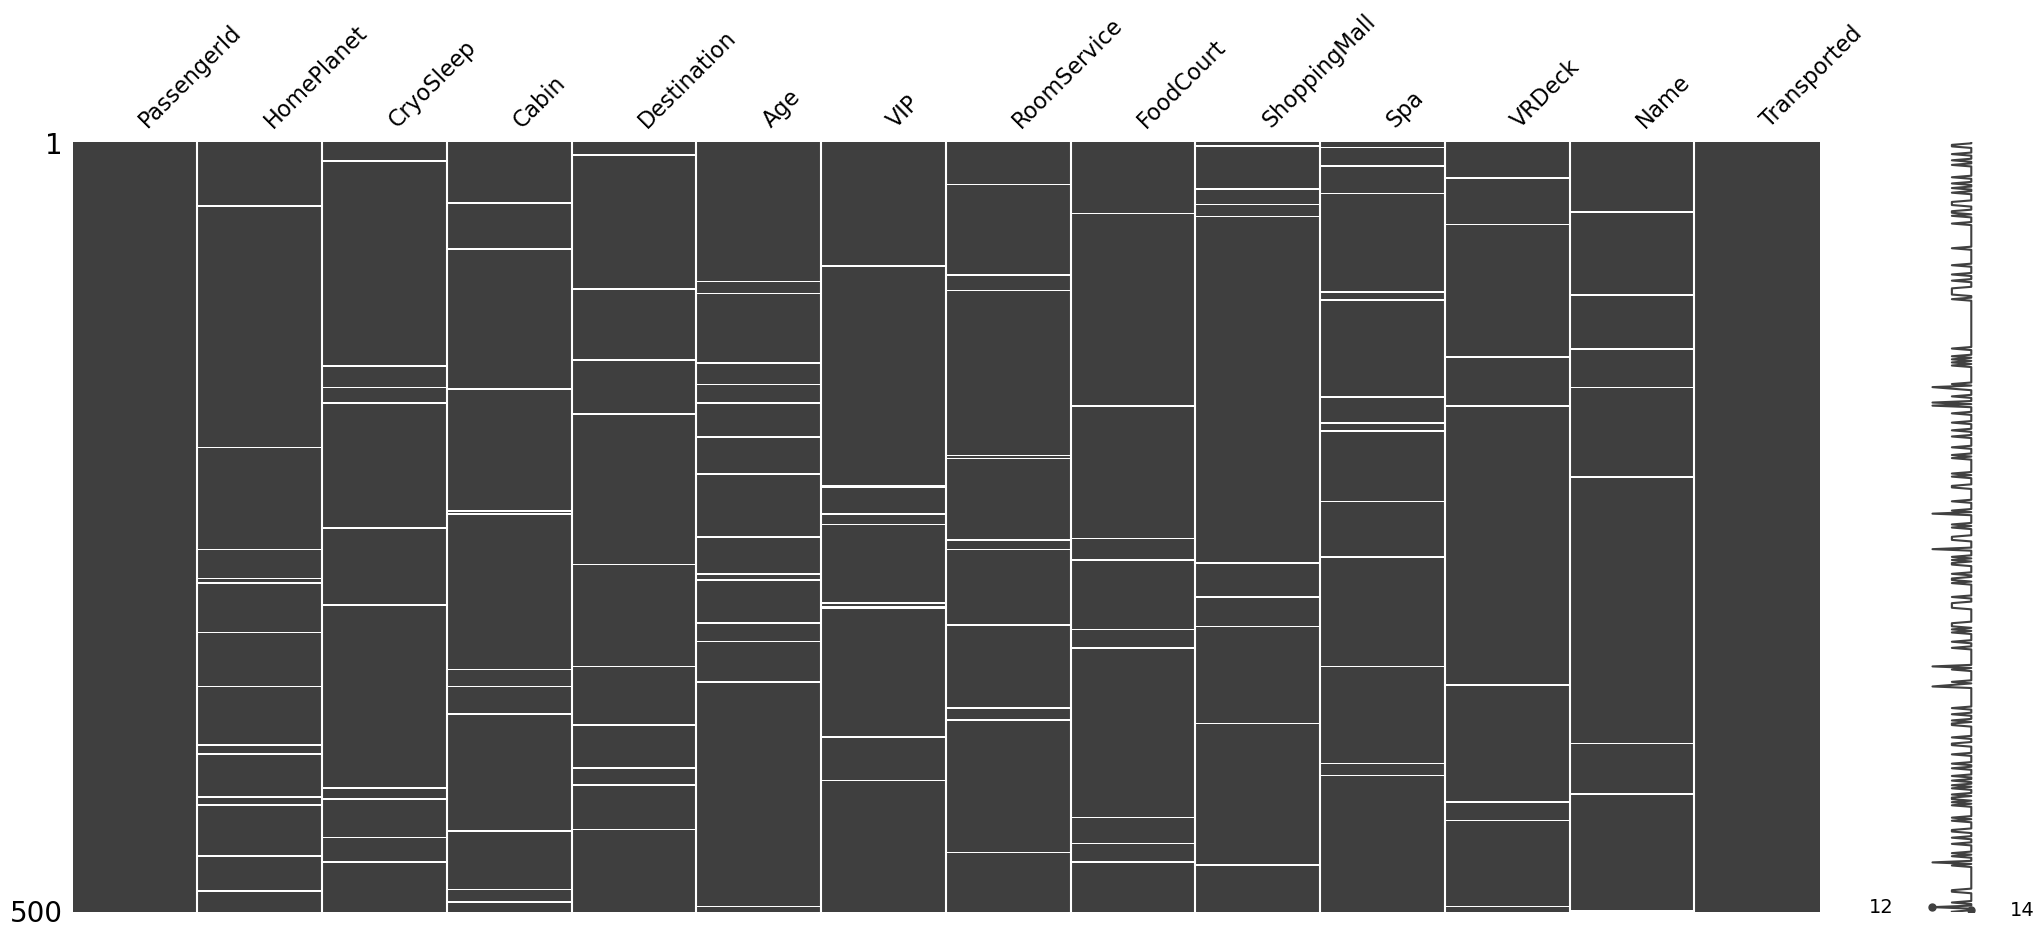

In [56]:
import missingno as msno
msno.matrix(df.sample(500))

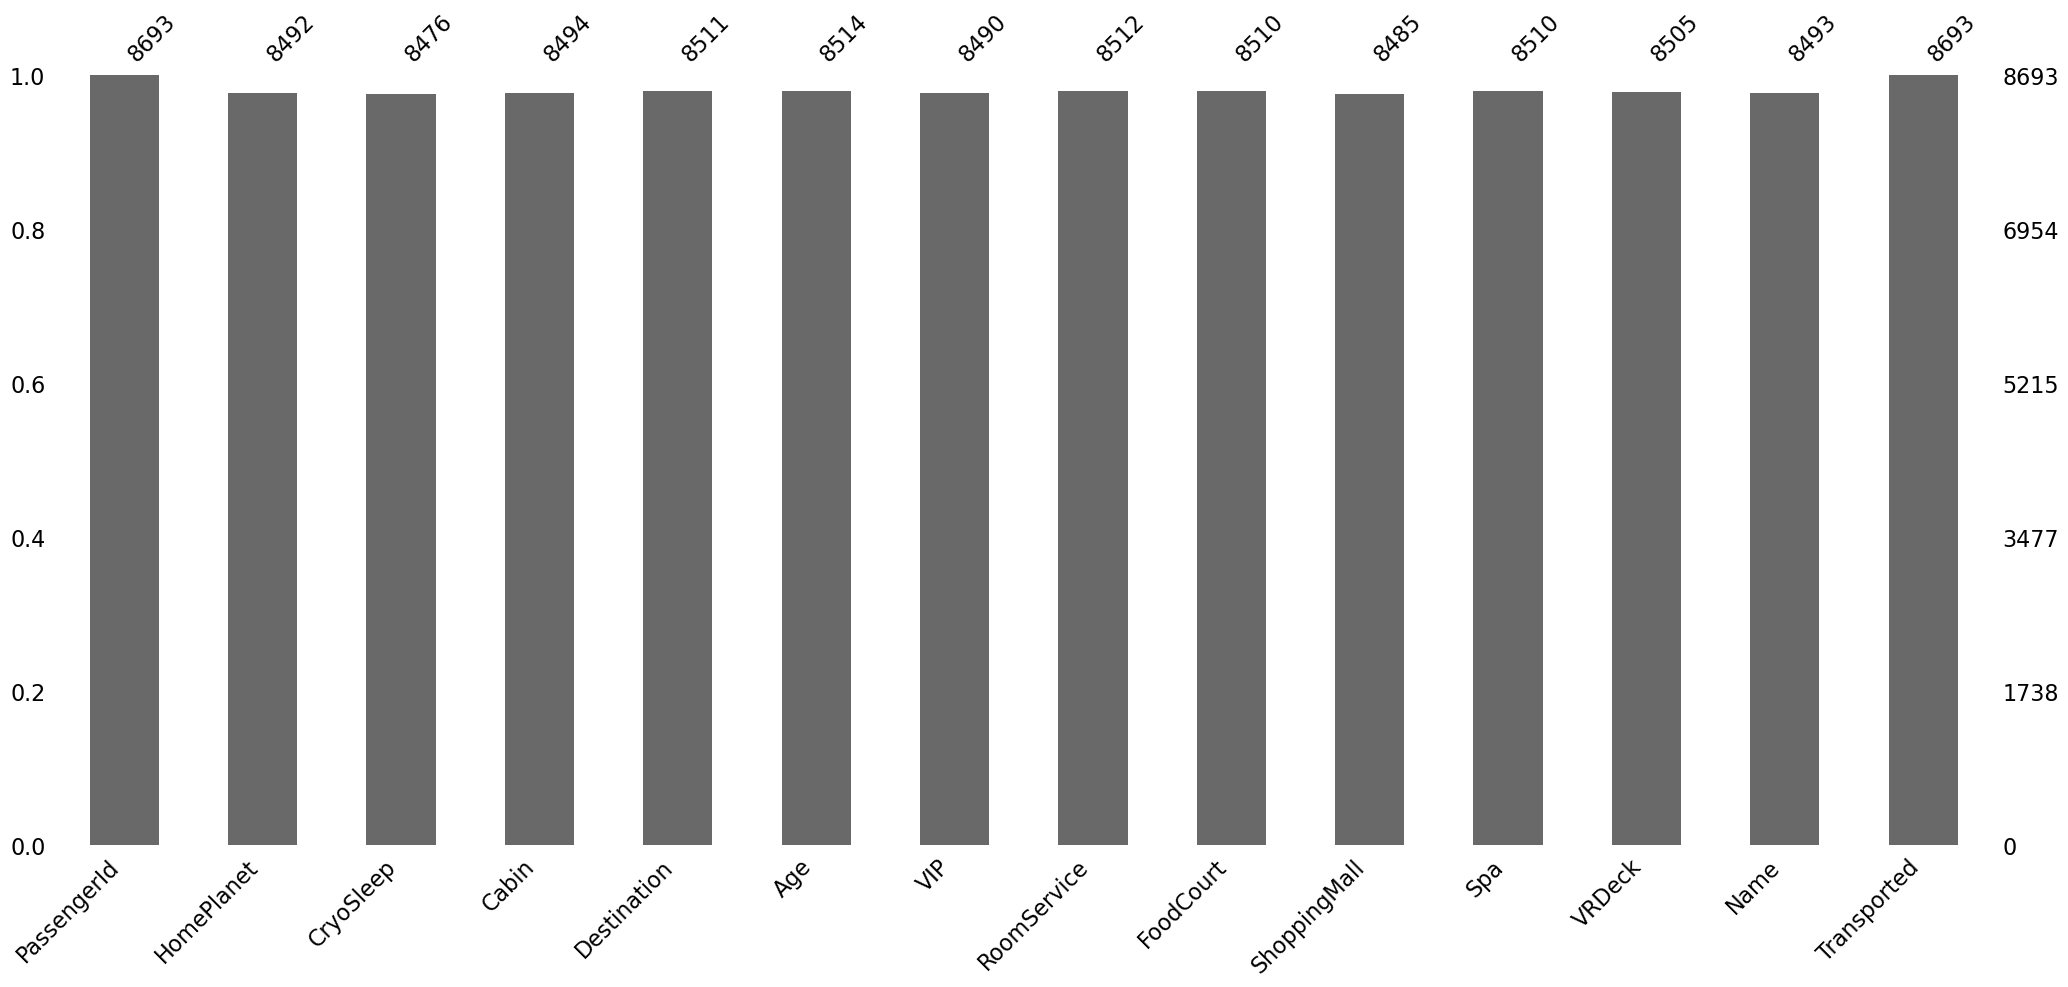

In [6]:
msno.bar(df);

In [3]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df.isna().sum(axis=1).ge(3).sum()

17

In [9]:
df.isna().sum(axis=1).ge(4).sum()

0

In [59]:
df['Cabin_first_letter'] = df['Cabin'].str[0]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   HomePlanet          8492 non-null   object 
 2   CryoSleep           8476 non-null   object 
 3   Cabin               8494 non-null   object 
 4   Destination         8511 non-null   object 
 5   Age                 8514 non-null   float64
 6   VIP                 8490 non-null   object 
 7   RoomService         8512 non-null   float64
 8   FoodCourt           8510 non-null   float64
 9   ShoppingMall        8485 non-null   float64
 10  Spa                 8510 non-null   float64
 11  VRDeck              8505 non-null   float64
 12  Name                8493 non-null   object 
 13  Transported         8693 non-null   bool   
 14  Cabin_first_letter  8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ 

In [58]:
nunique = df.nunique()
category_col = nunique[nunique <= 10].drop('Transported', errors = 'ignore')
category_col

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
dtype: int64

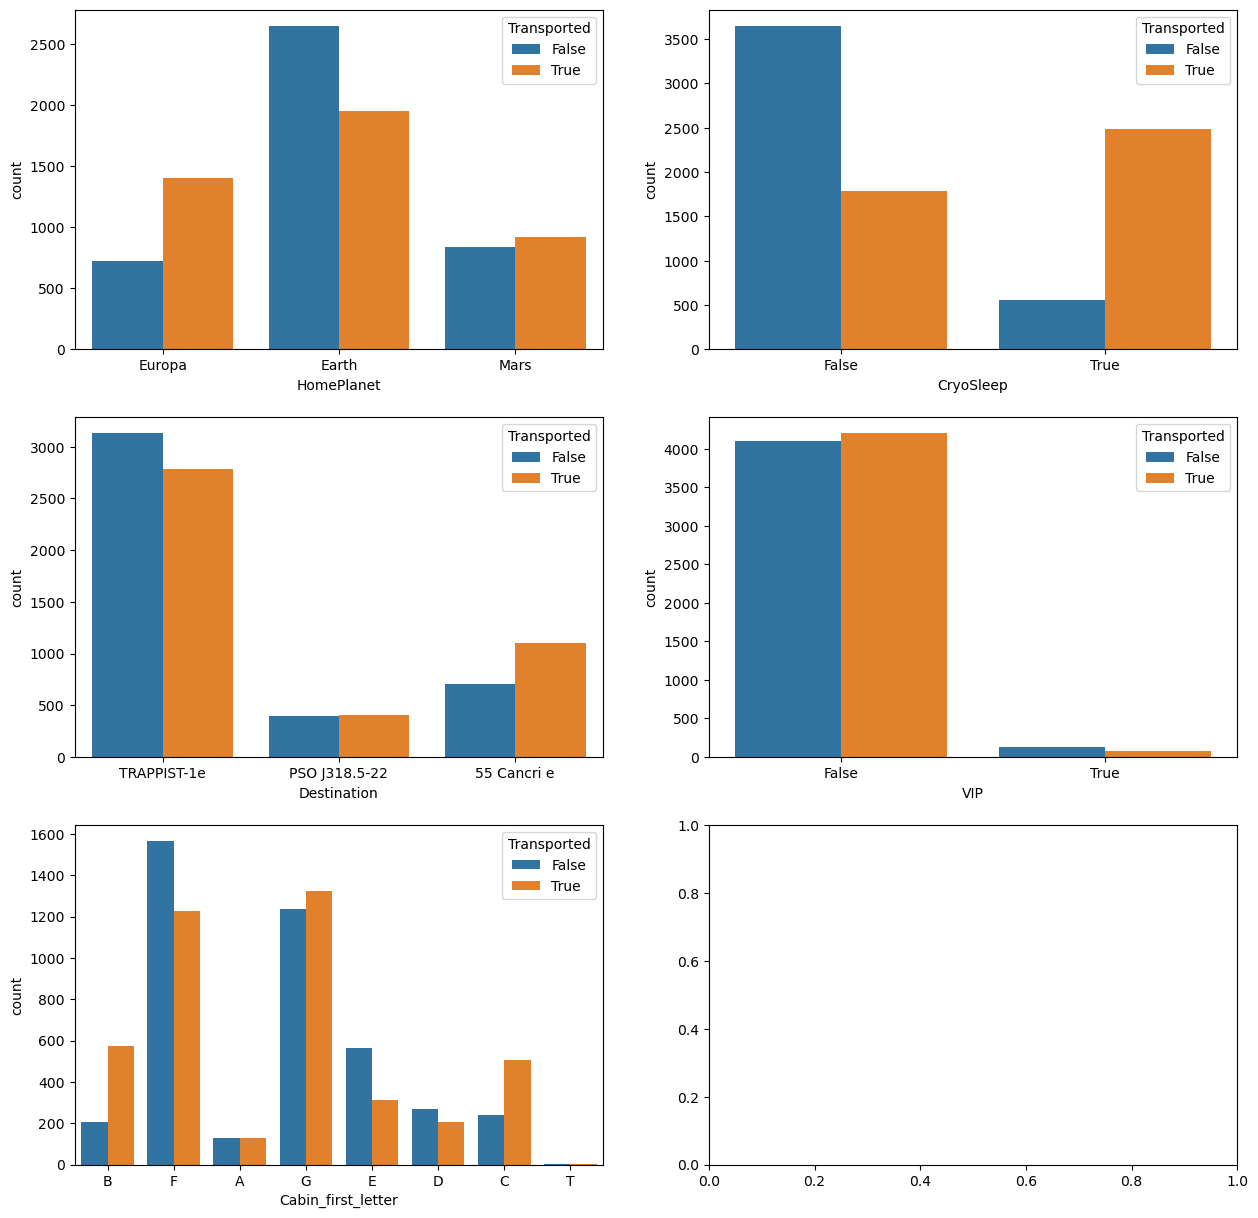

In [32]:
category_col_name = category_col.index.tolist()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, category_col_name in enumerate(category_col_name):
    row = i // 2
    col = i % 2
    sns.countplot(x=category_col_name,data=df, hue = 'Transported', ax=axes[row][col])

In [10]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Cabin_first_letter'] = df['Cabin'].str[0]
df['CryoSleep'].replace(np.nan, 'CryoSleep', inplace  = True)

df = pd.get_dummies(df, columns=['HomePlanet','Destination','VIP','Cabin_first_letter','CryoSleep'])



In [11]:
df.Age.fillna(df.Age.median(), inplace=True)
df.RoomService.fillna(df.RoomService.median(), inplace=True)
df.FoodCourt.fillna(df.FoodCourt.median(), inplace=True)
df.ShoppingMall.fillna(df.ShoppingMall.median(), inplace=True)
df.Spa.fillna(df.Spa.median(), inplace=True)
df.VRDeck.fillna(df.VRDeck.median(), inplace=True)

df = df.drop(['PassengerId','Cabin','Name'], axis=1)


In [40]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns 
numeric_columns = numeric_columns.append(pd.Index(['Transported']))
df_corr = df[numeric_columns].corr()
df_corr.style.background_gradient()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<Axes: >

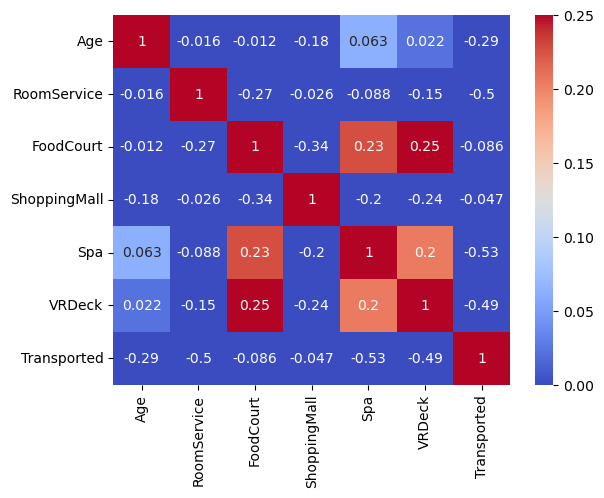

In [42]:
sns.heatmap(df_corr.corr(), annot=True, vmax=0.25, vmin=0,cmap="coolwarm")

In [12]:
from sklearn.model_selection import train_test_split


X = df.drop('Transported', axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [17]:
y_predict = model.predict(X_test)
y_predict

array([ True,  True,  True, ...,  True, False,  True])

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7642323174238068

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# 모델들을 리스트로 생성
base_models  = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Neural Network', MLPClassifier())
]

In [24]:
from sklearn.ensemble import StackingClassifier

# StackingClassifier 설정
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=True
)

In [25]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_model)])

# 모델 훈련 및 평가
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacked Model Accuracy: {accuracy}')

c:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacked Model Accuracy: 0.7981598619896493
